# Airline Passenger Satisfaction Analysis using Machine Learning Techniques


### 1) Load the required libraries

In [1]:
# import 'os'
import  os

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'matplotlib.pyplot' 
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

from   sklearn.preprocessing    import  OrdinalEncoder
from   sklearn.preprocessing    import  LabelEncoder
labelencoder = LabelEncoder()

In [2]:
import time
from    datetime   import datetime
from    datetime   import timedelta

start_time = time.time()

In [3]:
# Figure size
sns.set(rc={'figure.figsize':(10,10)}) #width=10, #height=10

In [4]:
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api                        as      sm
import statsmodels.stats.api                  as      sms
import statsmodels.formula.api                as      smf

from    statsmodels.tools.eval_measures       import   rmse
from    statsmodels.compat                    import   lzip
from    statsmodels.stats.outliers_influence  import   variance_inflation_factor
from    statsmodels.stats.diagnostic          import   linear_rainbow

import  statsmodels.tsa.api                   as       smt
from    statsmodels.graphics.gofplots         import   qqplot
from    statsmodels.stats.stattools           import   durbin_watson

# 'SciPy' is used to perform scientific computations
from    scipy                                 import   stats
from    scipy.stats                           import   shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from    sklearn.metrics                       import   mean_absolute_error
from    sklearn.metrics                       import   mean_squared_error

In [5]:
import pandas                         as     pd
import numpy                          as     np
import seaborn                        as     sns
import matplotlib.pyplot              as     plt
import statsmodels.api                as     sm
import sys, os, six

from   sklearn                        import  metrics 
from   sklearn.metrics                import  classification_report
from   sklearn.metrics                import  confusion_matrix
from   sklearn.metrics                import  roc_curve, auc
from   sklearn.model_selection        import  train_test_split, cross_val_score
# !pip install pydotplus ### if not available in the Python Environment
#import pydotplus

# !pip install pydot ### if not available in the Python Environment
#import pydot

## ! pip install  graphviz  ### if not available in the Python Environment

In [6]:
### Imputing missing numerical values using the IterativeImputer class in sklearn 

from sklearn.experimental  import   enable_iterative_imputer
from sklearn.impute        import   IterativeImputer
from sklearn.linear_model   import   LinearRegression


In [7]:
from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from   sklearn.tree             import _tree

In [8]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero & Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero & Missing Values'] = 100 * mz_table['Total Zero & Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

# Attributes

### 2) Read Data File

In [9]:
filename                       =  r'G:\DSE-Capstone\DSE-C-Jan22-Group2\Data\airline_clnd.csv'
airline_passenger_satisfaction =  pd.read_csv(filename)
airline_passenger_satisfaction.head().T

,0,1,2,3,4
SR,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer_Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type_of_Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight_Distance,460,235,1142,562,214
Inflight_wifi_service,3,3,2,2,3
Departure/Arrival_time_convenient,4,2,2,5,3


In [10]:
airline_passenger_satisfaction.drop(['SR', 'id'],axis=1,inplace=True)
airline_passenger_satisfaction.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.000000,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.000000,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.000000,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.000000,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.000000,satisfied


In [11]:
Most_important_vars = ['Online_boarding', 'Inflight_wifi_service', 'Type_of_Travel', 'Inflight_entertainment',\
                       'Class_code', 'Customer_Type']

## Find and report the missing values

In [12]:
missing_zero_values_table(airline_passenger_satisfaction)

Your selected dataframe has 23 columns and 103904 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type
Arrival_Delay_in_Minutes,58159,310,0.300000,58469,56.300000,float64


In [13]:
df            =    airline_passenger_satisfaction.copy()

In [14]:
df['satisfaction'].replace('neutral or dissatisfied', 1, inplace = True)
df['satisfaction'].replace('satisfied', 0, inplace = True)

In [15]:
ord_enc                                             = OrdinalEncoder()

In [16]:
df['Gender_code']          = ord_enc.fit_transform(df[['Gender']])
df['Customer_Type_code']   = ord_enc.fit_transform(df[['Customer_Type']])
df['Type_of_Travel_code']  = ord_enc.fit_transform(df[['Type_of_Travel']])
df['Class_code']           = ord_enc.fit_transform(df[['Class']])

In [17]:
num_variables_df = df.select_dtypes(include = 'number')
print(num_variables_df.shape)
print(num_variables_df.columns)

(103904, 23)
Index(['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'Gender_code', 'Customer_Type_code',
       'Type_of_Travel_code', 'Class_code'],
      dtype='object')


In [18]:
lreg         =  LinearRegression()
imp          =  IterativeImputer(estimator= lreg, missing_values = np.nan, max_iter = 10, verbose = 2,\
                                 imputation_order= 'roman',random_state = 0)
X            =  imp.fit_transform(num_variables_df)

[IterativeImputer] Completing matrix with shape (103904, 23)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.94
[IterativeImputer] Change: 431.9401728514561, scaled tolerance: 4.9830000000000005 
[IterativeImputer] Ending imputation round 2/10, elapsed time 3.77
[IterativeImputer] Change: 0.0, scaled tolerance: 4.9830000000000005 
[IterativeImputer] Early stopping criterion reached.


In [19]:
X_df           =    pd.DataFrame(X, columns = [ 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'Gender_code', 'Customer_Type_code',
       'Type_of_Travel_code', 'Class_code'])

In [20]:

missing_zero_values_table(X_df)  

Your selected dataframe has 23 columns and 103904 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type


In [21]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  float64
 1   Flight_Distance                    103904 non-null  float64
 2   Inflight_wifi_service              103904 non-null  float64
 3   Departure/Arrival_time_convenient  103904 non-null  float64
 4   Ease_of_Online_booking             103904 non-null  float64
 5   Gate_location                      103904 non-null  float64
 6   Food_and_drink                     103904 non-null  float64
 7   Online_boarding                    103904 non-null  float64
 8   Seat_comfort                       103904 non-null  float64
 9   Inflight_entertainment             103904 non-null  float64
 10  On-board_service                   103904 non-null  float64
 11  Leg_room_service                   1039

In [22]:
X_df.head().T

,0,1,2,3,4
Age,13.000000,25.000000,26.000000,25.000000,61.000000
Flight_Distance,460.000000,235.000000,1142.000000,562.000000,214.000000
Inflight_wifi_service,3.000000,3.000000,2.000000,2.000000,3.000000
Departure/Arrival_time_convenient,4.000000,2.000000,2.000000,5.000000,3.000000
Ease_of_Online_booking,3.000000,3.000000,2.000000,5.000000,3.000000
Gate_location,1.000000,3.000000,2.000000,5.000000,3.000000
Food_and_drink,5.000000,1.000000,5.000000,2.000000,4.000000
Online_boarding,3.000000,3.000000,5.000000,2.000000,5.000000
Seat_comfort,5.000000,1.000000,5.000000,2.000000,5.000000
Inflight_entertainment,5.000000,1.000000,5.000000,2.000000,3.000000


In [23]:
int_type_cols = [ 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'satisfaction', 'Gender_code', 'Customer_Type_code',
       'Type_of_Travel_code', 'Class_code']
X_df[int_type_cols] = X_df[int_type_cols].astype(int)
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int32  
 1   Flight_Distance                    103904 non-null  int32  
 2   Inflight_wifi_service              103904 non-null  int32  
 3   Departure/Arrival_time_convenient  103904 non-null  int32  
 4   Ease_of_Online_booking             103904 non-null  int32  
 5   Gate_location                      103904 non-null  int32  
 6   Food_and_drink                     103904 non-null  int32  
 7   Online_boarding                    103904 non-null  int32  
 8   Seat_comfort                       103904 non-null  int32  
 9   Inflight_entertainment             103904 non-null  int32  
 10  On-board_service                   103904 non-null  int32  
 11  Leg_room_service                   1039

<AxesSubplot:xlabel='index', ylabel='satisfaction'>

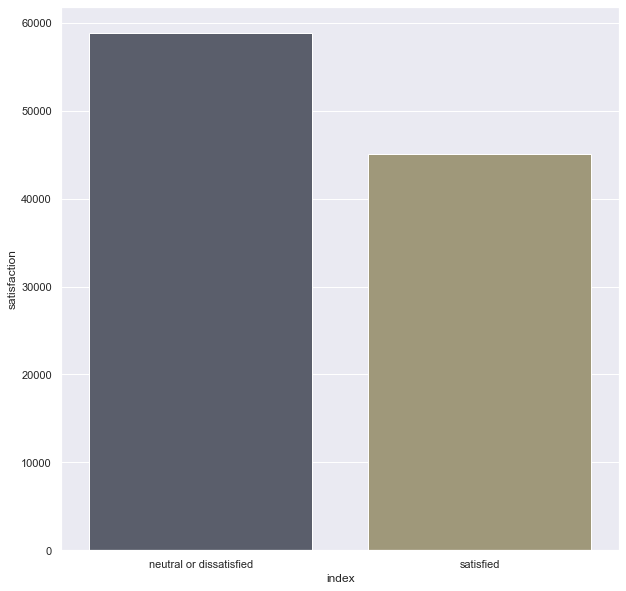

In [24]:
vc  =  airline_passenger_satisfaction['satisfaction'].value_counts().reset_index()
sns.barplot(x = 'index', y = 'satisfaction', data = vc,  palette = 'cividis')

## Observation

#### Dataset is not perfectly balanced. We need to use Precision, Recall of the minority class apart from AUROC as performance measures

### Prepare data for EDA

#### Replace imputed values for the column, satisfaction before doing EDA

In [25]:
X_df['satisfaction'].replace(1, 'neutral or dissatisfied', inplace = True)
X_df['satisfaction'].replace(0, 'satisfied', inplace = True)

In [26]:
airline_passenger_satisfaction['satisfaction']  =   X_df['satisfaction']

## 3) EDA

### 3.1 Satisfaction of Airline passengers Vs Online_boarding, Customer_type & Class

 Online_Boarding, Customer_type_code Vs Satisfaction of Airline Passengers


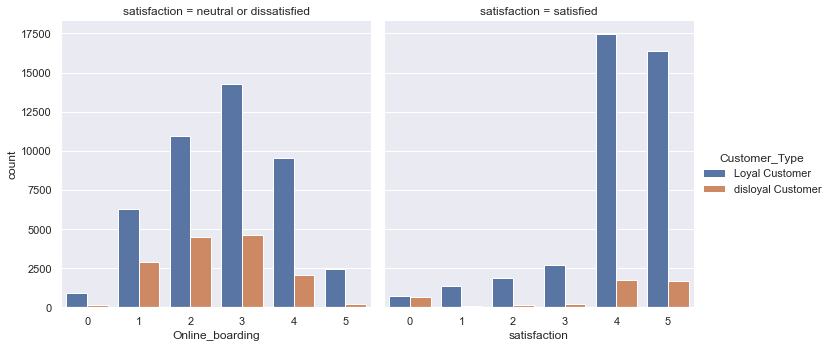

In [67]:
titlex = ' Online_Boarding, Customer_type_code Vs Satisfaction of Airline Passengers'
sns.catplot(data = airline_passenger_satisfaction,  x = 'Online_boarding', col = 'satisfaction',\
            hue = 'Customer_Type', kind = 'count')
print(titlex)
plt.xlabel('satisfaction')
plt.show()

### Inference

### 3.2 Satisfaction of Airline passengers Vs Inflight_wifi_service, Customer_type & Class

Inflight_wifi_service , Customer_type Vs Satisfaction of Airline Passengers


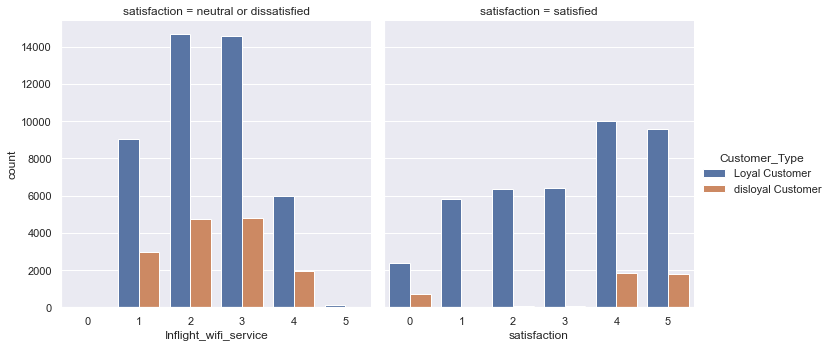

In [68]:
titlex = 'Inflight_wifi_service , Customer_type Vs Satisfaction of Airline Passengers'
sns.catplot(data = airline_passenger_satisfaction,  x = 'Inflight_wifi_service', col = 'satisfaction',\
            hue = 'Customer_Type', kind = 'count')
print(titlex)
plt.xlabel('satisfaction')
plt.show()

### Inference


### 3.3 Satisfaction of Airline passengers Vs Type_of_Travel, Customer_type & Class

Type_of_Travel , Customer_type Vs Satisfaction of Airline Passengers


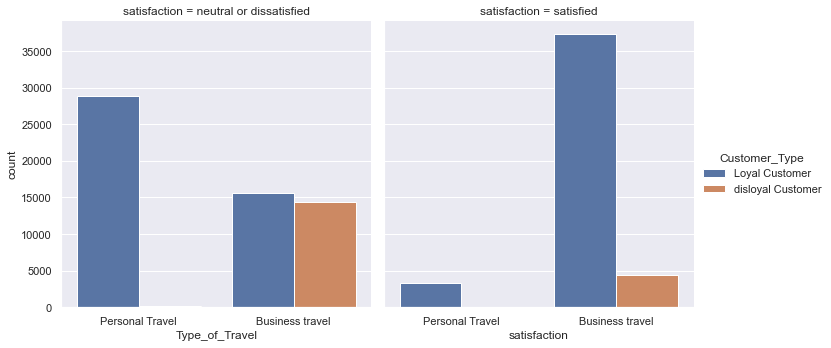

In [69]:
titlex = 'Type_of_Travel , Customer_type Vs Satisfaction of Airline Passengers'
sns.catplot(data = airline_passenger_satisfaction,  x = 'Type_of_Travel', col = 'satisfaction',\
            hue = 'Customer_Type', kind = 'count')
print(titlex)
plt.xlabel('satisfaction')
plt.show()

###  Inference

### 3.4 Satisfaction of Airline passengers Vs Inflight_entertainment, Customer_type & Class

Inflight_entertainment, Customer_type Vs Satisfaction of Airline Passengers


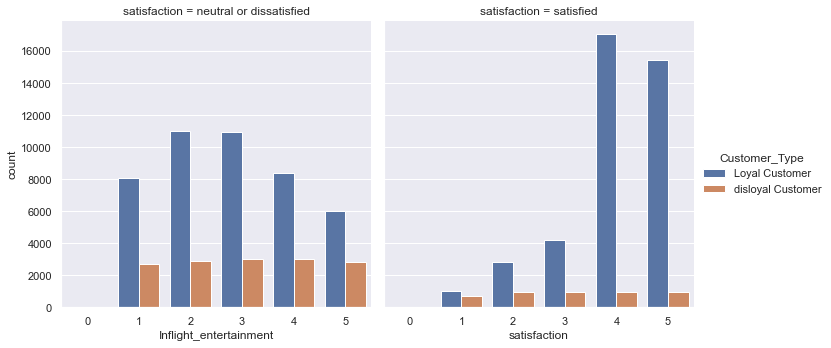

In [70]:
titlex = 'Inflight_entertainment, Customer_type Vs Satisfaction of Airline Passengers'
sns.catplot(data = airline_passenger_satisfaction,  x = 'Inflight_entertainment', col = 'satisfaction',\
            hue = 'Customer_Type', kind = 'count')
print(titlex)
plt.xlabel('satisfaction')
plt.show()

### Inference

### 3.5 Satisfaction of Airline passengers Vs Age, Gender & Class

Age, Gender Vs Satisfaction of Airline Passengers


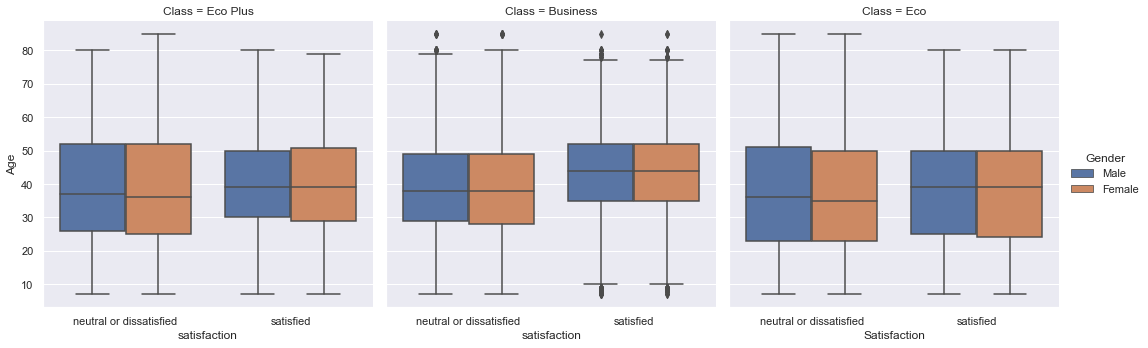

In [31]:
titlex = 'Age, Gender Vs Satisfaction of Airline Passengers'
sns.catplot(data = airline_passenger_satisfaction, x = 'satisfaction', y = 'Age', col = 'Class', hue = 'Gender', kind = 'box')
print(titlex)
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()

### Inference

### 3.6 Satisfaction of Airline passengers Vs Flight Distance, Gender & Class

Flight_Distance, Class Vs Satisfaction of Airline Passengers


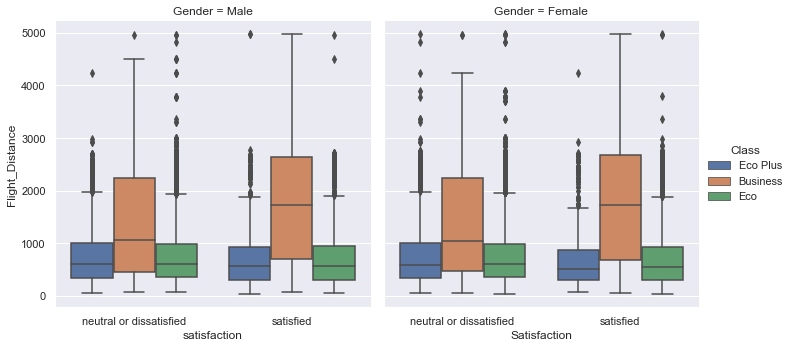

In [32]:
sns.catplot(data = airline_passenger_satisfaction, x = 'satisfaction', y = 'Flight_Distance', col = 'Gender',\
            hue = 'Class', kind = 'box')
titlex =  'Flight_Distance, Class Vs Satisfaction of Airline Passengers'
print(titlex)
plt.xlabel('Satisfaction')
plt.ylabel('Flight_Distance')
plt.show()

### Inference

### 3.7 Satisfaction of Airline passengers Vs Flight Distance, Type_of_Travel & Gender

Flight_Distance, Type_of_Travel Vs Satisfaction of Airline Passengers


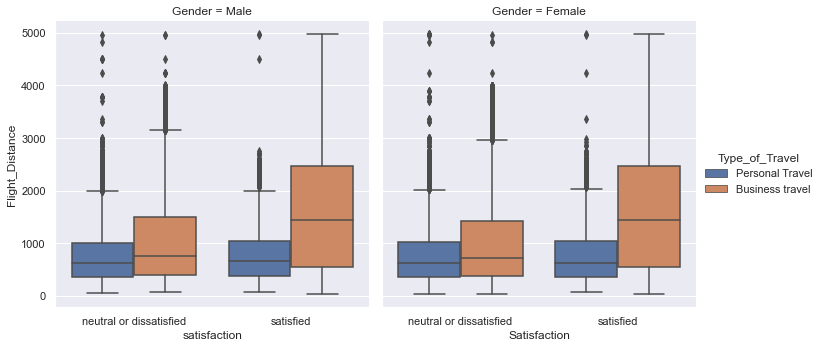

In [33]:
titlex  =  'Flight_Distance, Type_of_Travel Vs Satisfaction of Airline Passengers'
sns.catplot(data = airline_passenger_satisfaction, x = 'satisfaction', y = 'Flight_Distance', col = 'Gender',\
            hue = 'Type_of_Travel', kind = 'box')
print(titlex)
plt.xlabel('Satisfaction')
plt.ylabel('Flight_Distance')
plt.show()

### Inference

### 3.8 Satisfaction of Airline passengers Vs Departure_Delay_in_Minutes, Type_of_Travel & Gender


Departure_Delay_in_Minutes, Type_of_Travel Vs Satisfaction of Airline Passengers



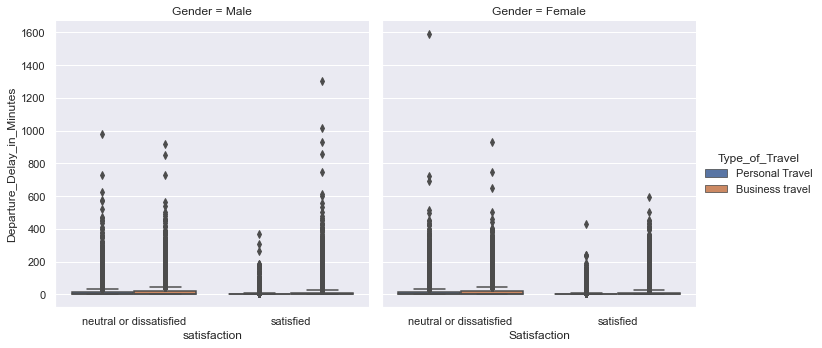

In [34]:
titlex  =  '\nDeparture_Delay_in_Minutes, Type_of_Travel Vs Satisfaction of Airline Passengers\n'
sns.catplot(data = airline_passenger_satisfaction, x = 'satisfaction', y = 'Departure_Delay_in_Minutes',\
            col = 'Gender', hue = 'Type_of_Travel', kind = 'box')
print(titlex)
plt.xlabel('Satisfaction')
plt.ylabel('Departure_Delay_in_Minutes')
plt.show()

### Inference

### 3.9 Satisfaction of Airline passengers Vs Arrival_Delay_in_Minutes, Type_of_Travel & Gender


Arrival_Delay_in_Minutes, Type_of_Travel Vs Satisfaction of Airline Passengers



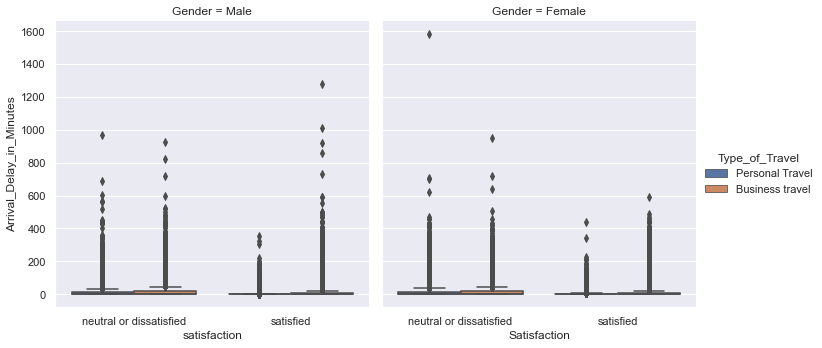

In [35]:
titlex  =  '\nArrival_Delay_in_Minutes, Type_of_Travel Vs Satisfaction of Airline Passengers\n'
sns.catplot(data = airline_passenger_satisfaction, x = 'satisfaction', y = 'Arrival_Delay_in_Minutes',\
            col = 'Gender', hue = 'Type_of_Travel', kind = 'box')
print(titlex)
plt.xlabel('Satisfaction')
plt.ylabel('Arrival_Delay_in_Minutes')
plt.show()

### Inference

# Base Model Building

## To print the elapsed time, first get the start time

In [36]:
import time
from datetime import timedelta

start_time = time.time()

! pip install pydotplus

! pip install pydot

! pip install graphviz

In [40]:
import pandas                         as     pd
import numpy                          as     np
import seaborn                        as     sns
import matplotlib.pyplot              as     plt
import statsmodels.api                as     sm
import sys, os, six

from   sklearn                        import  metrics 
from   sklearn.metrics                import  classification_report
from   sklearn.metrics                import  confusion_matrix
from   sklearn.metrics                import  roc_curve, auc
from   sklearn.model_selection        import  train_test_split, cross_val_score
 ##!pip install pydotplus ### if not available in the Python Environment
import pydotplus

# !pip install pydot ### if not available in the Python Environment
import pydot


In [41]:
from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from   sklearn.tree             import _tree

In [42]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   

In [43]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [44]:
def draw_decision_tree(model, X, y, flist, classlist, file_name = 'Tree'):
    
    from sklearn.tree            import export_graphviz
    from six                     import StringIO  
    from IPython.core.pylabtools import figsize
    from IPython.display         import Image
    figsize(12.5, 6)
    import pydot

    #dot_data = StringIO()  
    file_name_dot = file_name + '.dot'
    file_name_png = file_name + '.png'
    
    export_graphviz(model, out_file = file_name_dot, feature_names = flist,\
                    class_names = classlist, filled = True, rounded = True)
    (graph,) = pydot.graph_from_dot_file(file_name_dot)
    graph.write_png(file_name_png)
    return Image(file_name_png)

In [45]:
"""
   Function Name: compare_models

   Description: This **function** compares various algorithms on 
                 1) AUROC 2) Precision, 3) Recall
   
   Input: 1) splits for k fold 
          2) random seed number
          3) Training data for predictor variables
          4) Training data for target variable



   Output: Model comparison on these metrics 1) AUROC 2) Metrics - Precision, Recall
   
"""
def compare_models(n_splits, random_state, X, Y):  

    ### To compare algorithms
    
    import  matplotlib.pyplot            as      plt
    from    sklearn.model_selection      import  StratifiedKFold
    from    sklearn.model_selection      import  cross_val_score
    from    sklearn.linear_model         import  LogisticRegression
    from    sklearn.tree                 import  DecisionTreeClassifier
    from    sklearn.naive_bayes          import  GaussianNB
    from    sklearn.ensemble             import  RandomForestClassifier
    
    ### Prepare models
    
    models  = []
    models.append(('LR', LogisticRegression(max_iter=10000))) 
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    
    
    ### Evaluate model in turn
    
    scores_req =  ['roc_auc']
    
    for i in range(len(scores_req)):
        names          =   []
        results        =   []
        scoring        =   scores_req[i]
        print(scoring)
        
        for name, model in models:
            print("\n n_splits %d random_state %d" % (n_splits, random_state))        	
            skf            =   StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
            cv_results     =   cross_val_score(model, X, Y, cv = skf, scoring = scoring)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
        
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        
        fig = plt.figure()
        fig.suptitle(sub_title)
        ax  = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

In [46]:
def tree_to_rules(tree, feature_names, class_names):

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):

        indent = "  " * depth

        if (threshold[node] != -2):

            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")

            if left[node] != -1:

                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")

                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)

                print(indent,"}")

        else:
            if value[node][0,0] > value[node][0,1]:
              classified = class_names[0]
            else:
              classified = class_names[1]
            print(indent,"Class = " + classified)
    recurse(left, right, threshold, features, 0)

In [47]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int32  
 1   Flight_Distance                    103904 non-null  int32  
 2   Inflight_wifi_service              103904 non-null  int32  
 3   Departure/Arrival_time_convenient  103904 non-null  int32  
 4   Ease_of_Online_booking             103904 non-null  int32  
 5   Gate_location                      103904 non-null  int32  
 6   Food_and_drink                     103904 non-null  int32  
 7   Online_boarding                    103904 non-null  int32  
 8   Seat_comfort                       103904 non-null  int32  
 9   Inflight_entertainment             103904 non-null  int32  
 10  On-board_service                   103904 non-null  int32  
 11  Leg_room_service                   1039

In [48]:
X_df.columns

Index(['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'Gender_code', 'Customer_Type_code',
       'Type_of_Travel_code', 'Class_code'],
      dtype='object')

In [49]:
factor_var = ['Inflight_wifi_service', 'Departure/Arrival_time_convenient','Ease_of_Online_booking','Gate_location',\
              'Food_and_drink', 'Online_boarding', 'Seat_comfort','Inflight_entertainment','On-board_service',\
              'Leg_room_service','Baggage_handling', 'Checkin_service', 'Inflight_service','Cleanliness',\
              'satisfaction', 'Gender_code', 'Customer_Type_code', 'Type_of_Travel_code', 'Class_code']
###

X_df[factor_var] = X_df[factor_var].astype('category')
X_df.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Age                                103904 non-null  int32   
 1   Flight_Distance                    103904 non-null  int32   
 2   Inflight_wifi_service              103904 non-null  category
 3   Departure/Arrival_time_convenient  103904 non-null  category
 4   Ease_of_Online_booking             103904 non-null  category
 5   Gate_location                      103904 non-null  category
 6   Food_and_drink                     103904 non-null  category
 7   Online_boarding                    103904 non-null  category
 8   Seat_comfort                       103904 non-null  category
 9   Inflight_entertainment             103904 non-null  category
 10  On-board_service                   103904 non-null  category
 11  Leg_room_service          

### Prepare X representing predictor variables and y representing the response variable

In [50]:
y             =    X_df['satisfaction']
X             =    X_df.drop(['satisfaction'], axis = 1)     

### Do a spot check of models performance

roc_auc

 n_splits 10 random_state 12345
LR: 0.926432 (0.002977)

 n_splits 10 random_state 12345
CART: 0.946232 (0.001481)

 n_splits 10 random_state 12345
NB: 0.922364 (0.003094)

 n_splits 10 random_state 12345
RF: 0.993810 (0.000544)


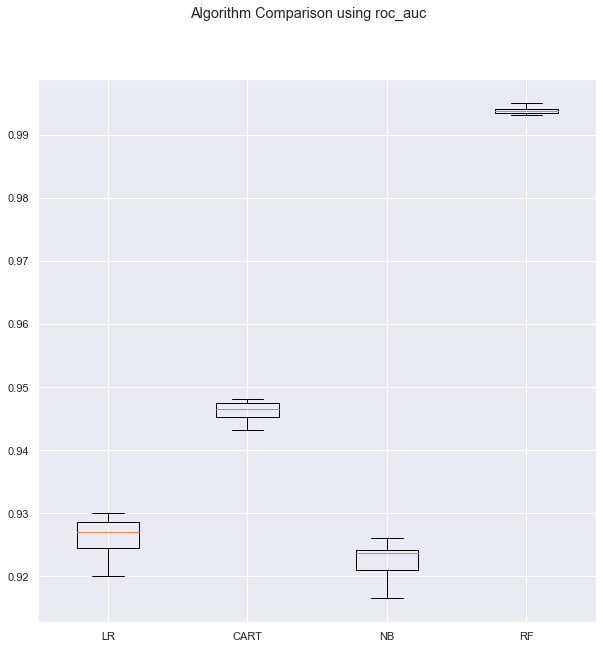

In [51]:
random_state = 12345; n_splits = 10
compare_models(n_splits, random_state, X, y)

### Observations

### Let us use Decision Tree model as our Base model

### Split data into training and test datasets

In [52]:
seed      = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, stratify = y) 

### Build Decision Tree model

In [53]:
clf    = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf    = clf.fit(X_train,y_train)

### Predict the response for train dataset

In [54]:
predicted_train = clf.predict(X_train)


Training Data
[[41215     0]
 [    0 31517]]


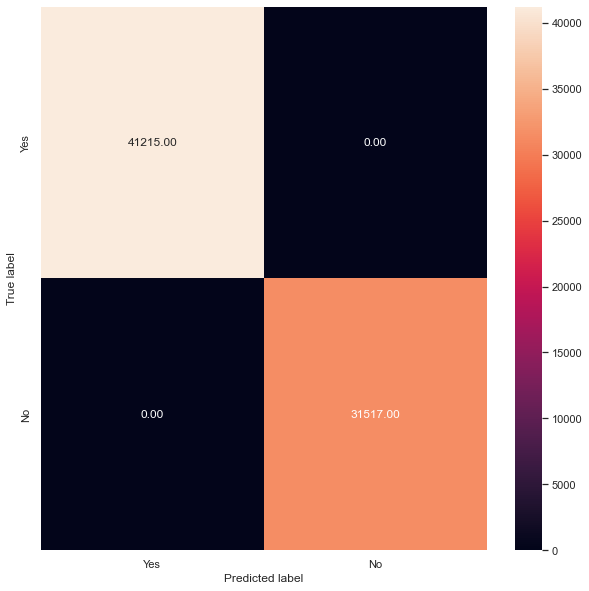

Training Accuracy: 100.000%


In [55]:
matrix             = confusion_matrix(y_train, predicted_train)
print("\nTraining Data")
print(matrix)
draw_cm(y_train, predicted_train)
###     
accuracy_train = clf.score(X_train, y_train) 
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [56]:
measures_train     = classification_report(y_train, predicted_train) 
print("\nTraining data")
print(measures_train) 


Training data
                         precision    recall  f1-score   support

neutral or dissatisfied       1.00      1.00      1.00     41215
              satisfied       1.00      1.00      1.00     31517

               accuracy                           1.00     72732
              macro avg       1.00      1.00      1.00     72732
           weighted avg       1.00      1.00      1.00     72732



### Predict the response for test dataset

In [57]:
predicted_testing = clf.predict(X_test)


Testing Data
[[16774   890]
 [  797 12711]]


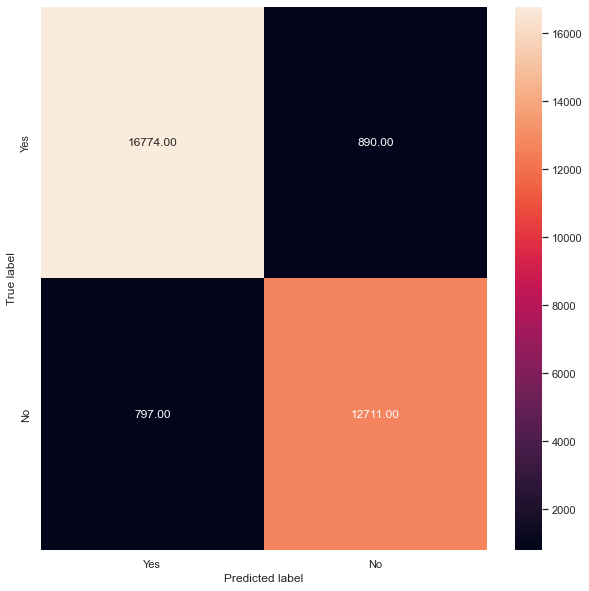

Testing Accuracy: 94.588%


In [58]:
matrix             = confusion_matrix(y_test, predicted_testing)
print("\nTesting Data")
print(matrix)
draw_cm(y_test, predicted_testing )
    
accuracy_train = clf.score(X_test, y_test) 
print("Testing Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [59]:
measures_test     = classification_report(y_test, predicted_testing) 
print("\nTraining data")
print(measures_test) 


Training data
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     17664
              satisfied       0.93      0.94      0.94     13508

               accuracy                           0.95     31172
              macro avg       0.94      0.95      0.94     31172
           weighted avg       0.95      0.95      0.95     31172



### Observations

### Get insights from the model

In [60]:
flist     = X.columns
classlist = ['Satisfied', 'Not Satisfied']

# Plot a tree
draw_decision_tree(clf, X_train, y_train, flist, classlist, file_name = 'Tree')

### Pruning the tree

In [61]:
clf1    = DecisionTreeClassifier(max_depth = 4, random_state = 12345).fit(X_train,y_train)

"""

DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)

"""

"\n\nDecisionTreeClassifier(\n    *,\n    criterion='gini',\n    splitter='best',\n    max_depth=None,\n    min_samples_split=2,\n    min_samples_leaf=1,\n    min_weight_fraction_leaf=0.0,\n    max_features=None,\n    random_state=None,\n    max_leaf_nodes=None,\n    min_impurity_decrease=0.0,\n    class_weight=None,\n    ccp_alpha=0.0,\n)\n\n"

#  Plot a Pruned tree
draw_decision_tree(clf1, X_train, y_train, flist, classlist, file_name = 'Tree')

In [62]:
tree_to_rules(clf1, flist, classlist)

 if ( Online_boarding <= 3.5 ) {
   if ( Inflight_wifi_service <= 0.5 ) {
     if ( Cleanliness <= 0.5 ) {
       Class = Satisfied
     } else {
       Class = Not Satisfied
     }
   } else {
     if ( Inflight_wifi_service <= 3.5 ) {
       if ( Class_code <= 0.5 ) {
         Class = Satisfied
       } else {
         Class = Satisfied
       }
     } else {
       if ( Inflight_wifi_service <= 4.5 ) {
         Class = Satisfied
       } else {
         Class = Not Satisfied
       }
     }
   }
 } else {
   if ( Type_of_Travel_code <= 0.5 ) {
     if ( Inflight_entertainment <= 3.5 ) {
       if ( Online_boarding <= 4.5 ) {
         Class = Satisfied
       } else {
         Class = Not Satisfied
       }
     } else {
       if ( Customer_Type_code <= 0.5 ) {
         Class = Not Satisfied
       } else {
         Class = Not Satisfied
       }
     }
   } else {
     if ( Inflight_wifi_service <= 4.5 ) {
       if ( Inflight_wifi_service <= 3.5 ) {
         Class = Satisfied
    

<function matplotlib.pyplot.show(close=None, block=None)>

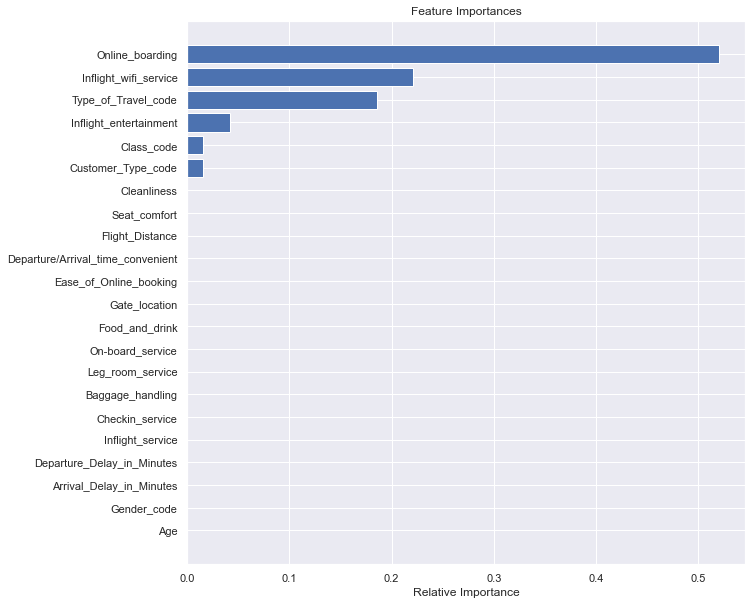

In [63]:
importances = clf1.feature_importances_
indices     = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [flist[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

In [64]:
idf =  pd.DataFrame({'Name' : [flist[i] for i in indices], 'Value' : importances[indices] *100 })

In [65]:
idf.sort_values('Value', ascending = False, inplace = True)
idf.set_index(keys = 'Name', inplace = True)

In [66]:
idf

,Value
Name,
Online_boarding,51.991207
Inflight_wifi_service,22.151439
Type_of_Travel_code,18.585790
Inflight_entertainment,4.180145
Class_code,1.533722
Customer_Type_code,1.516948
Cleanliness,0.040748
Gender_code,0.000000
Seat_comfort,0.000000
